In [2]:
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df=pd.DataFrame()
filenames = glob("DataGovSG/*_rainfall.csv")
for filename in filenames:
    other_df = pd.read_csv(filename)
    other_df = other_df.rename(columns={"value": "rainfall"})
    other_df["timestamp_sgt"] = other_df["timestamp_sgt"].astype("datetime64[ns]")
    df = df.append(other_df,ignore_index=True)

In [4]:
another_df = df.set_index("station_id").sort_index()

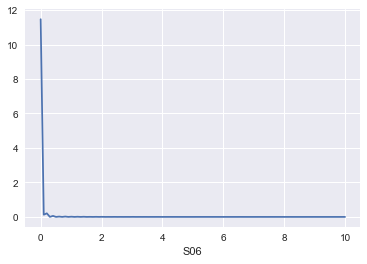

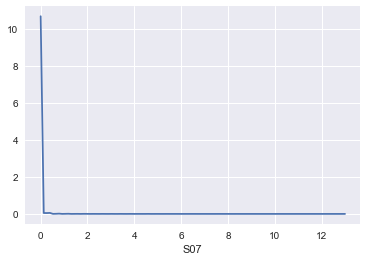

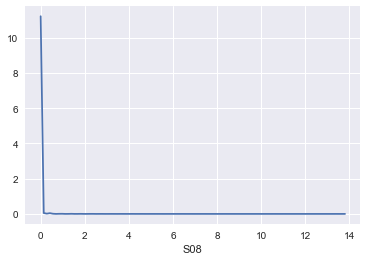

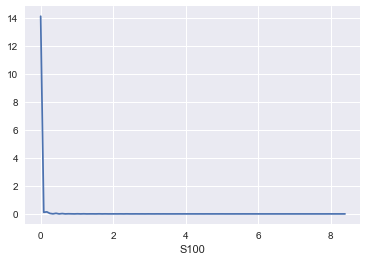

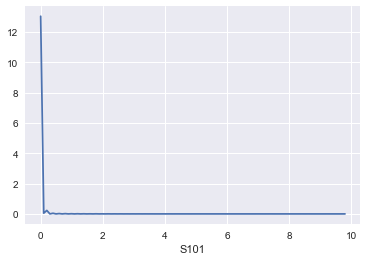

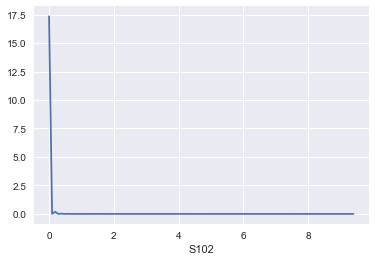

Error


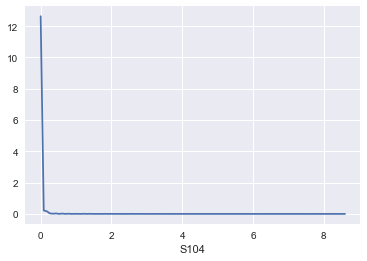

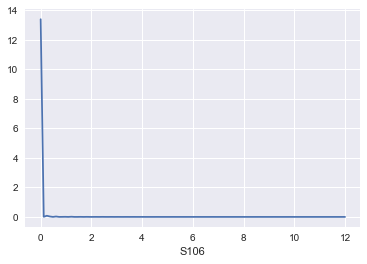

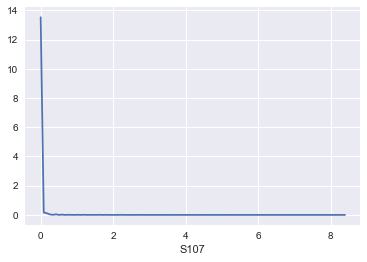

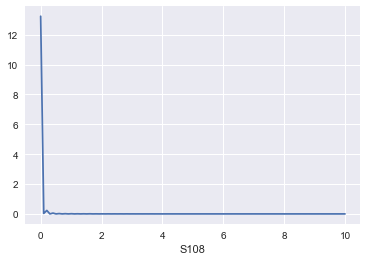

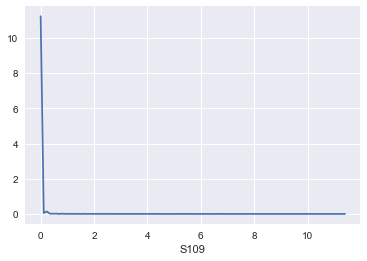

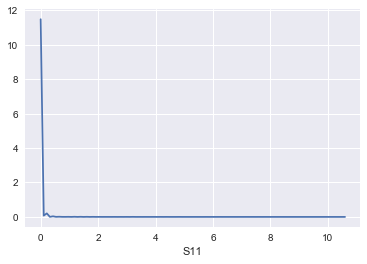

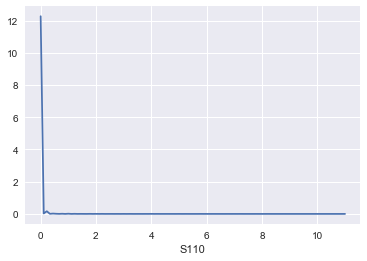

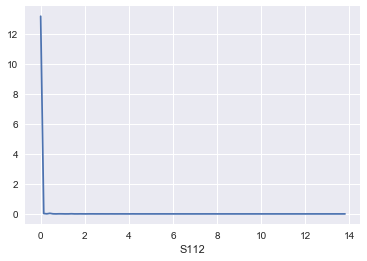

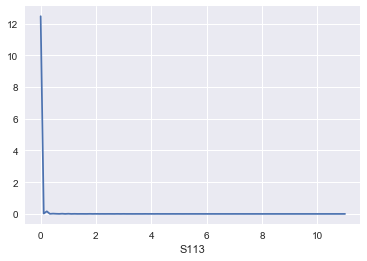

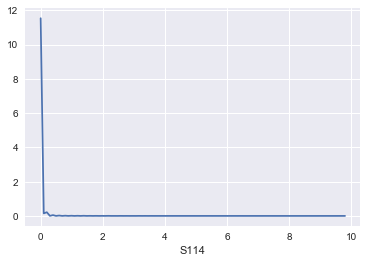

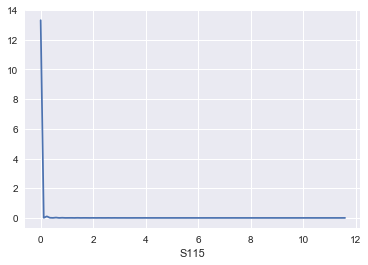

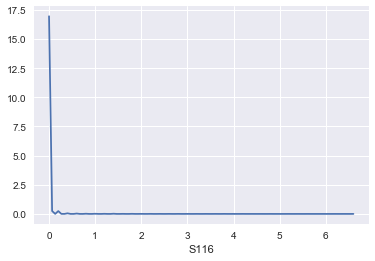

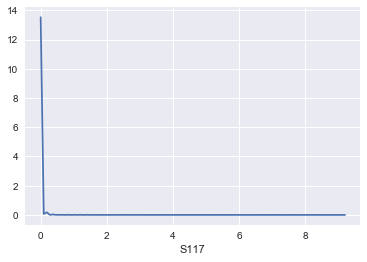

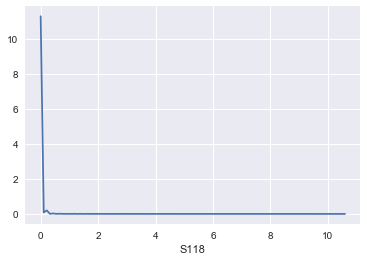

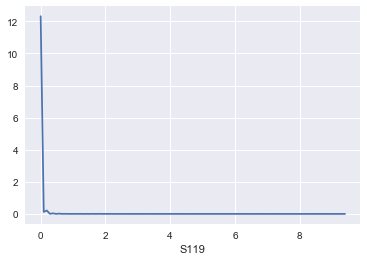

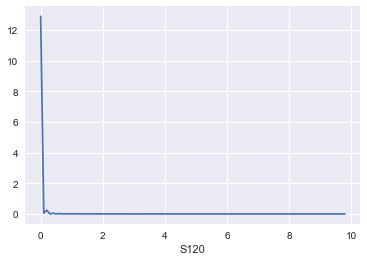

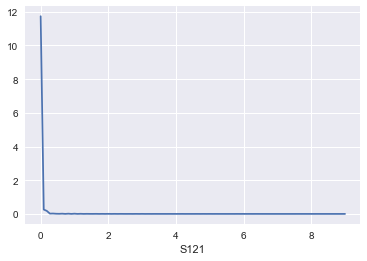

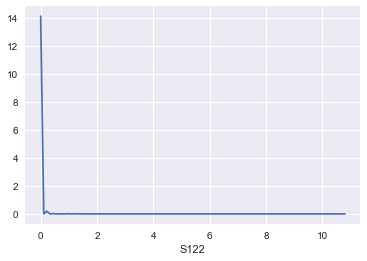

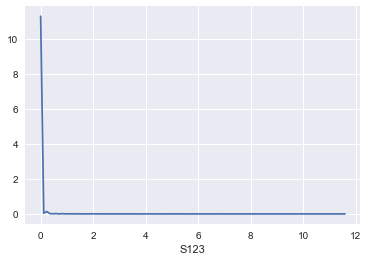

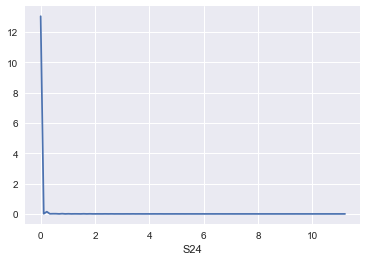

Error


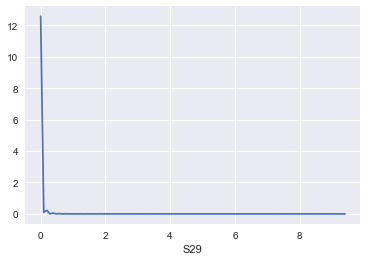

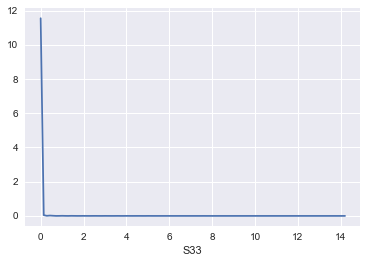

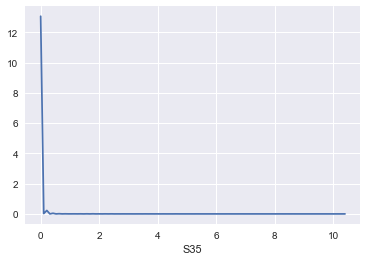

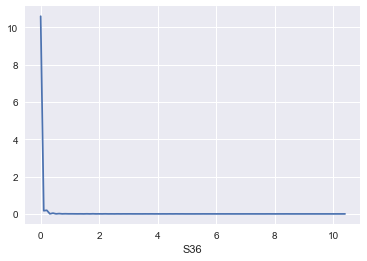

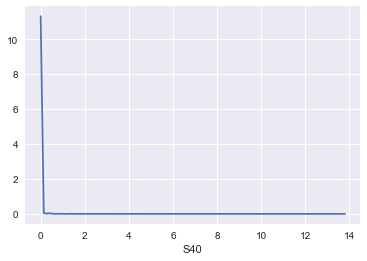

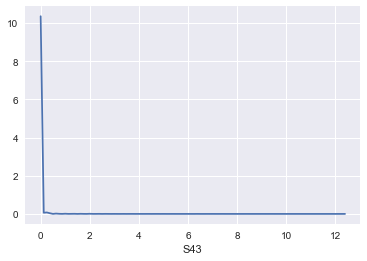

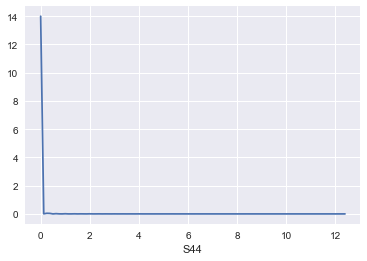

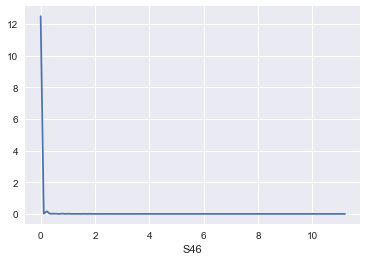

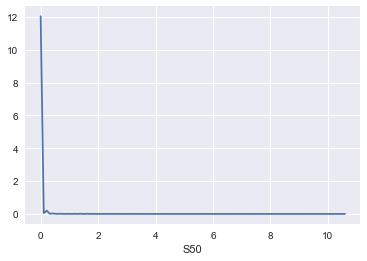

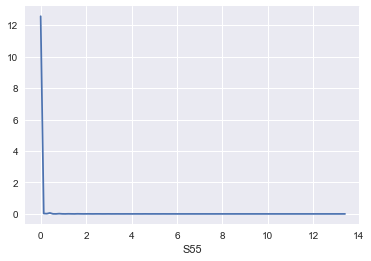

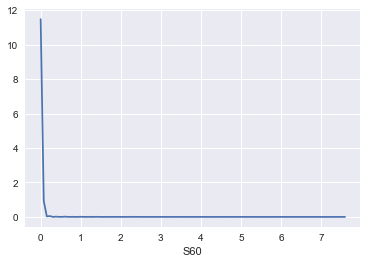

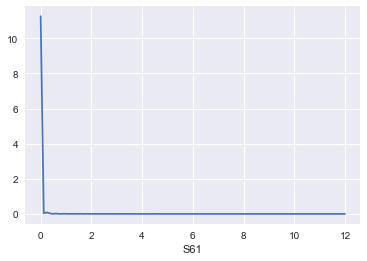

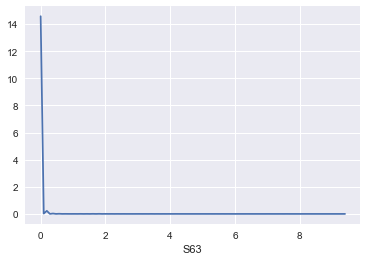

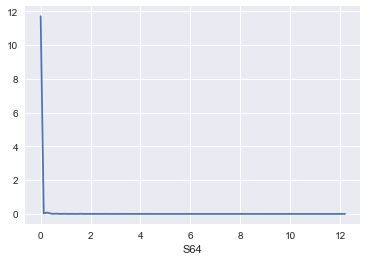

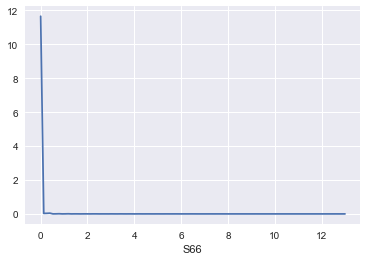

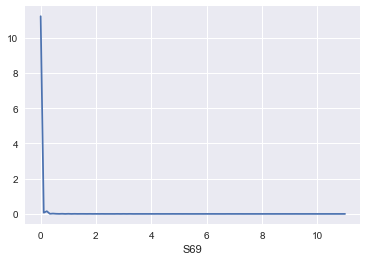

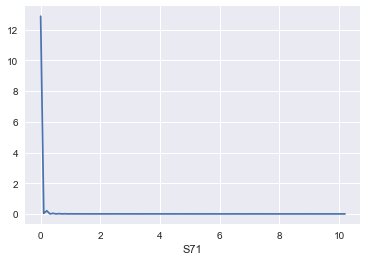

Error


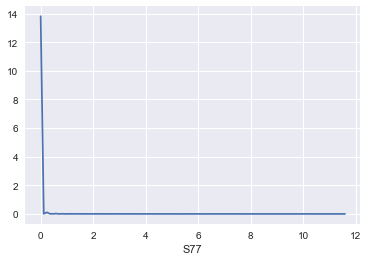

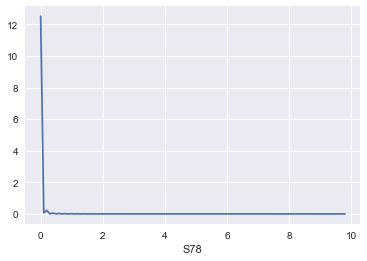

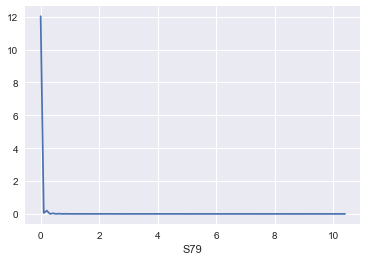

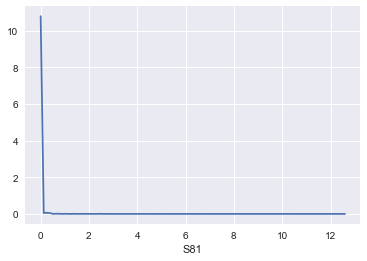

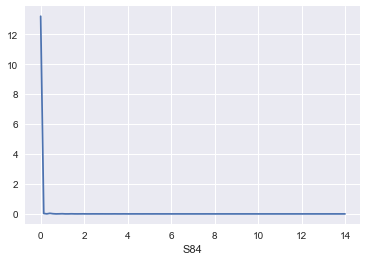

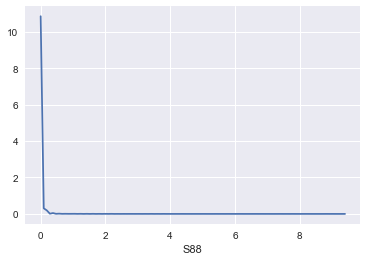

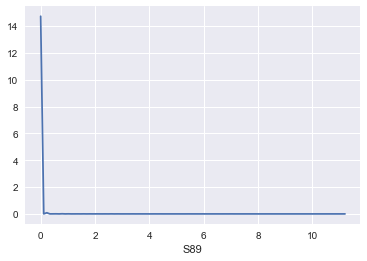

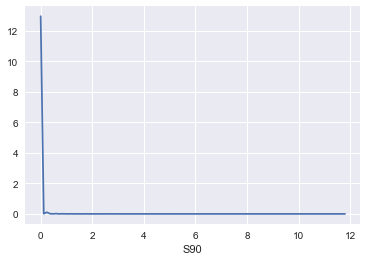

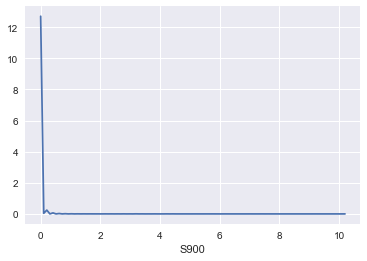

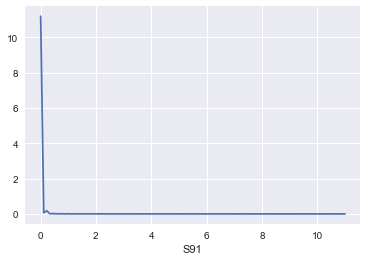

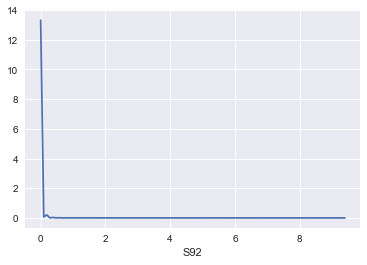

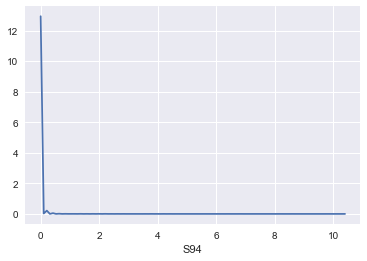

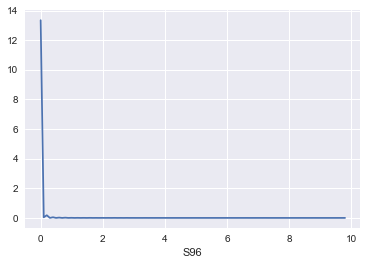

Error


In [7]:
from scipy.stats.kde import gaussian_kde
from numpy import linspace
stations = another_df.index.unique().tolist()
for station in stations:
    try:
        classified = another_df.loc[station]
        classified = classified.set_index("timestamp_sgt")
        data = classified["rainfall"]
        kde = gaussian_kde(data)
        dist_space = linspace( min(data), max(data), 100 )
    #plot = classified.plot.density(x=classified.index)
        plt.xlabel(station)
        plt.plot(dist_space, kde(dist_space))
        plt.show()
    except np.linalg.LinAlgError:
        print("Error")
        continue

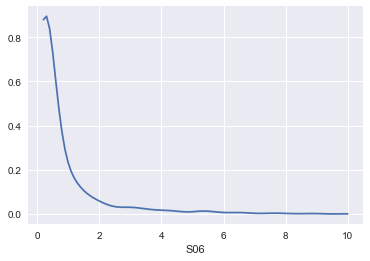

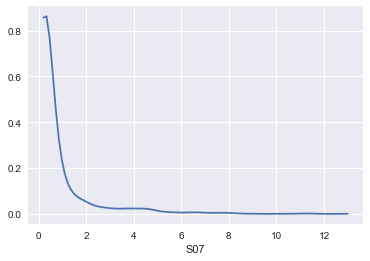

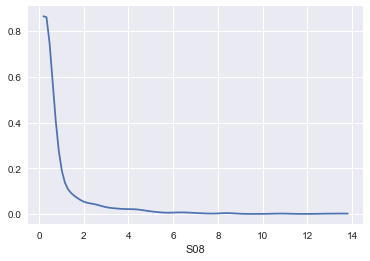

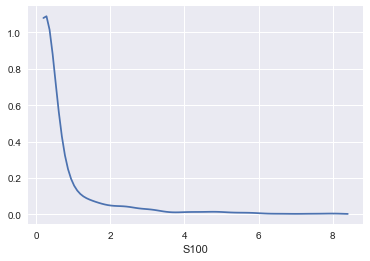

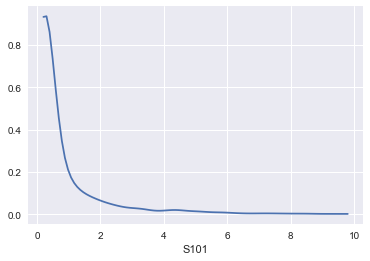

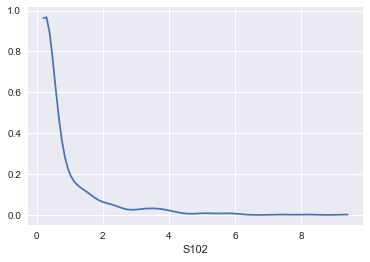

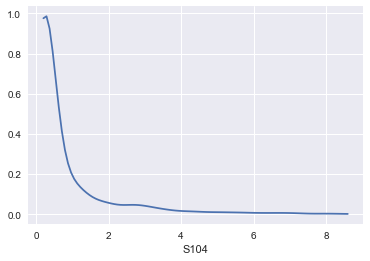

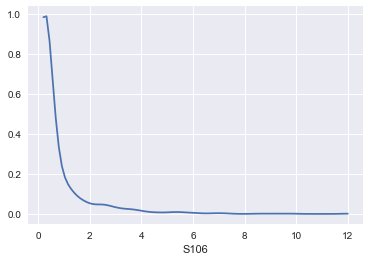

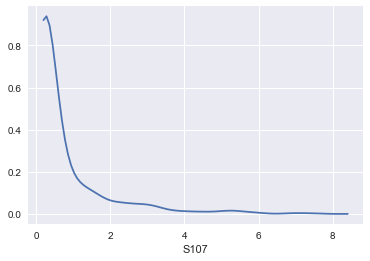

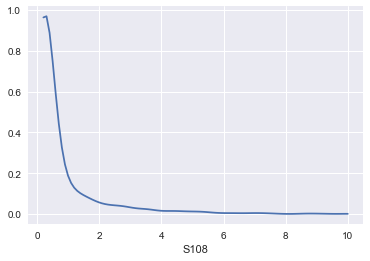

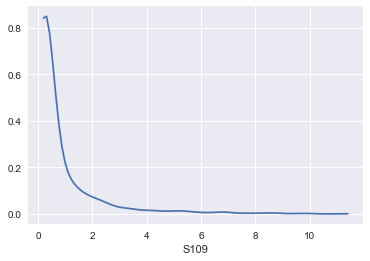

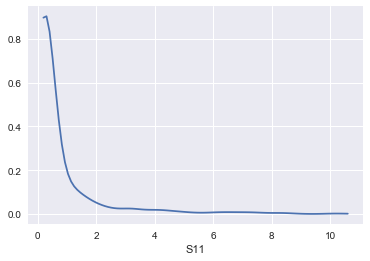

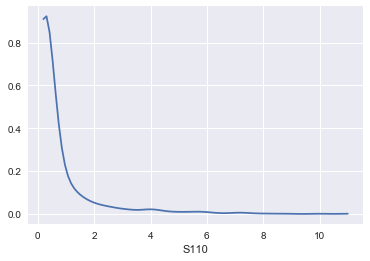

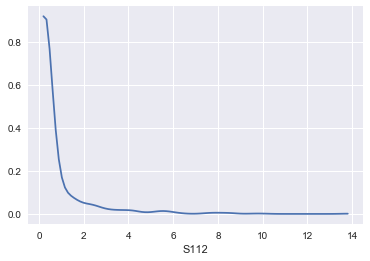

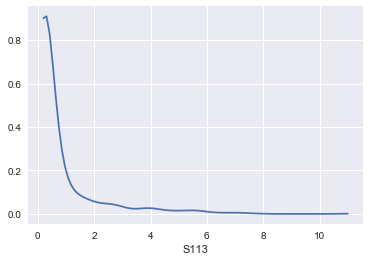

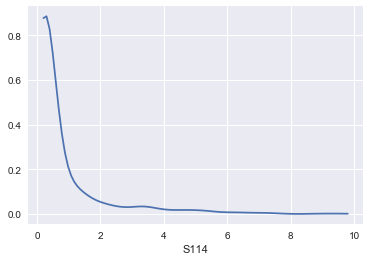

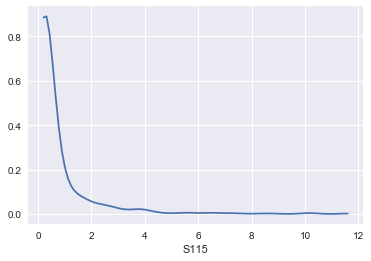

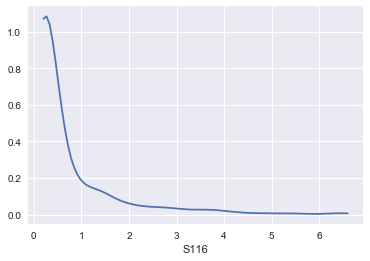

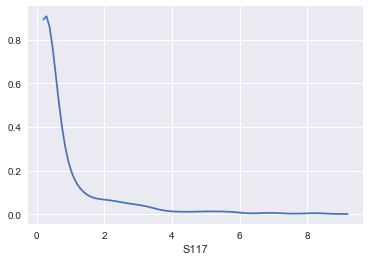

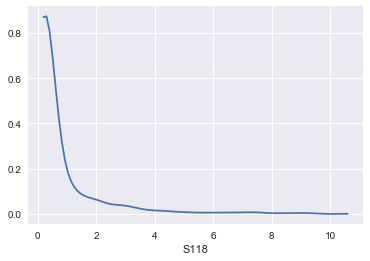

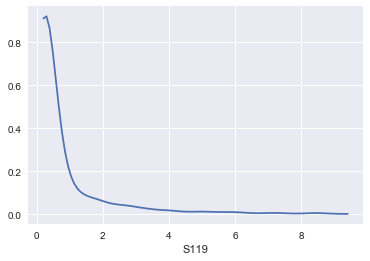

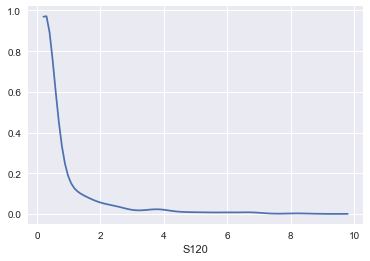

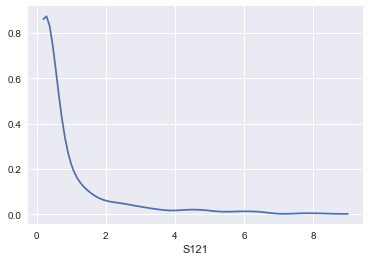

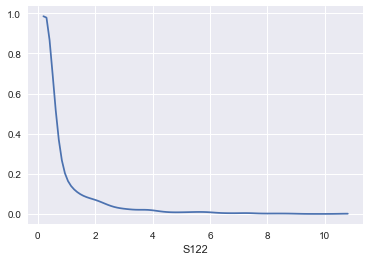

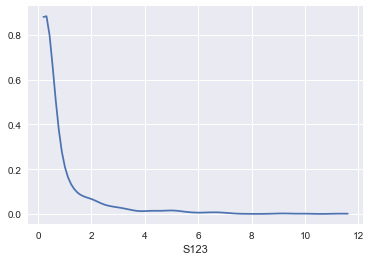

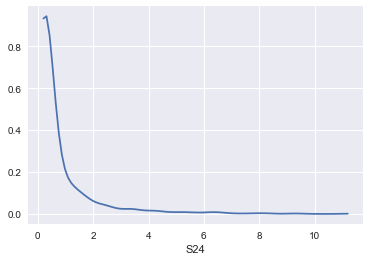

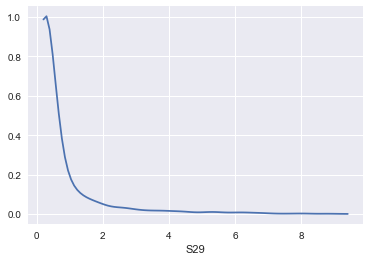

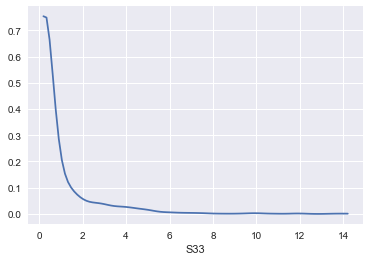

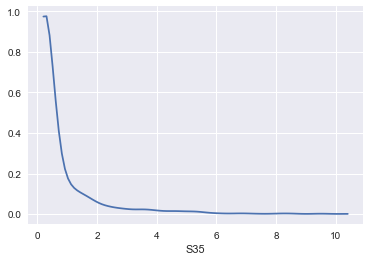

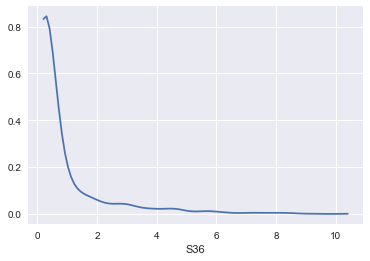

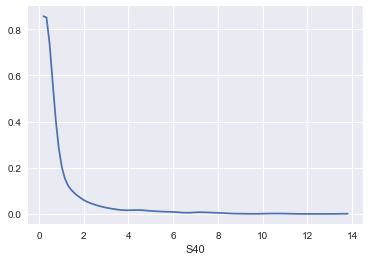

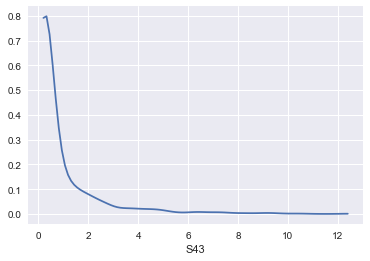

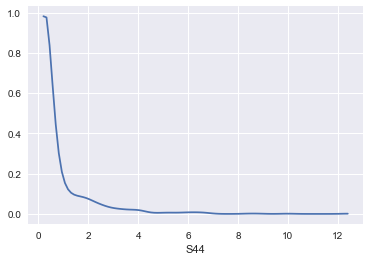

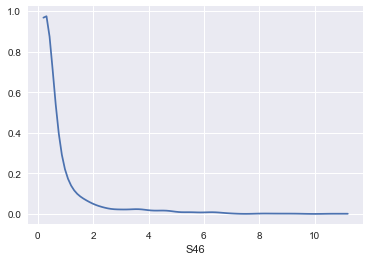

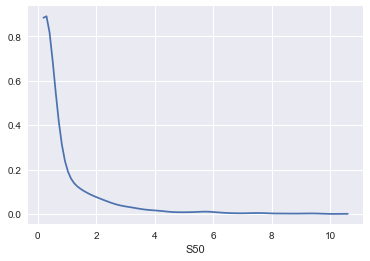

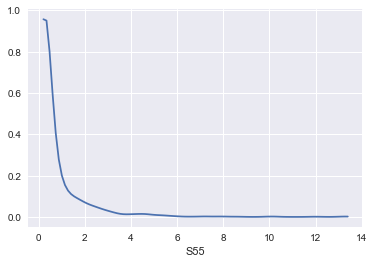

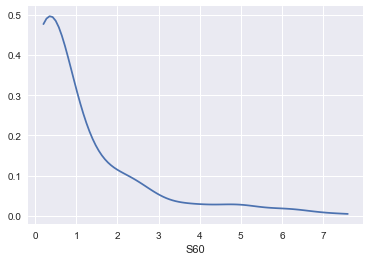

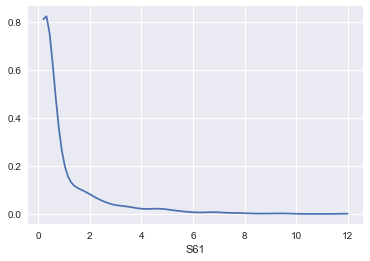

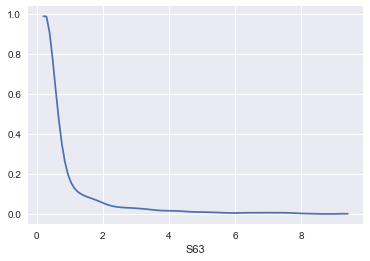

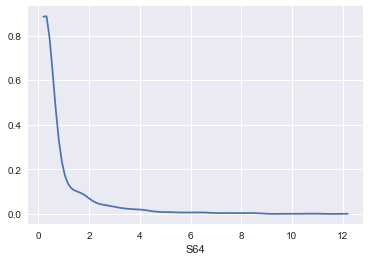

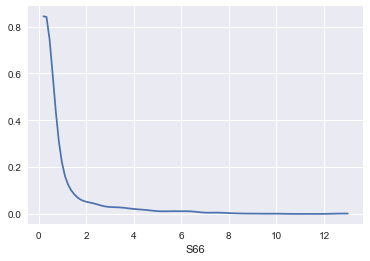

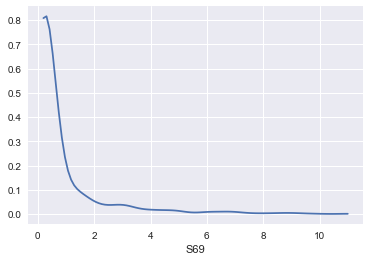

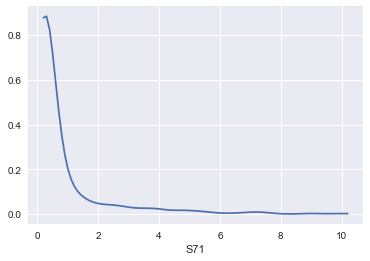

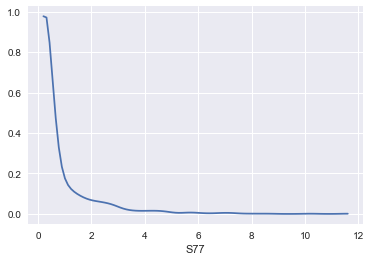

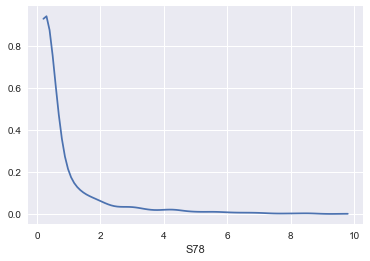

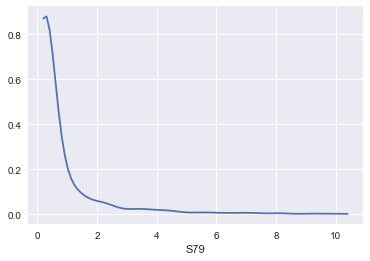

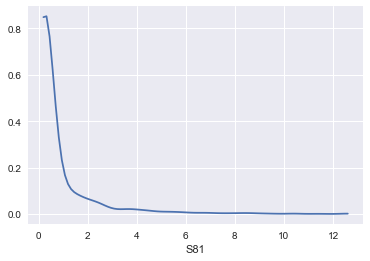

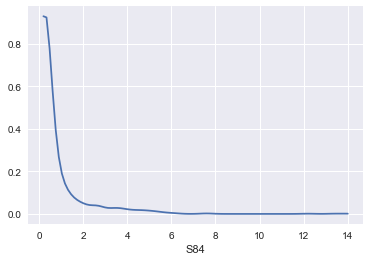

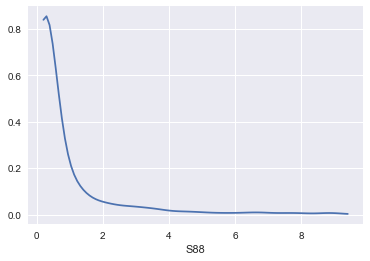

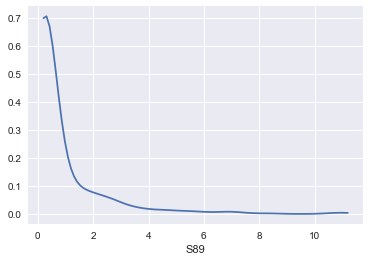

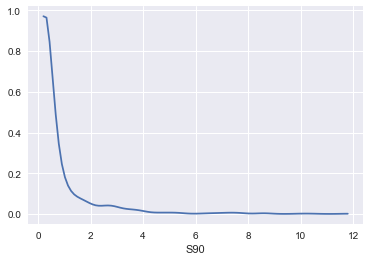

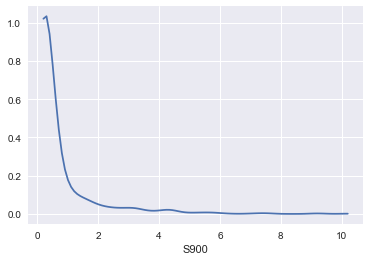

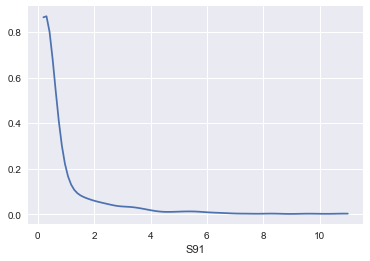

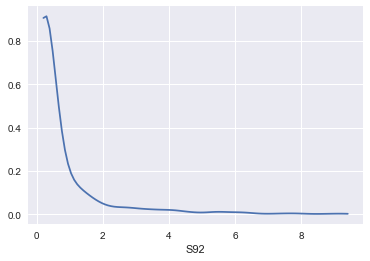

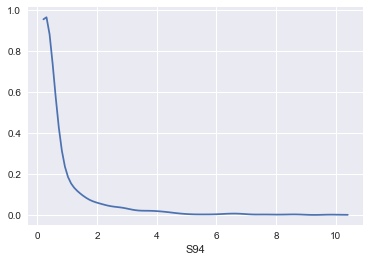

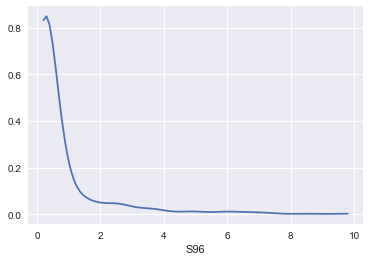

In [8]:
non_zero = another_df[another_df["rainfall"]>0]
stations = non_zero.index.unique().tolist()
for station in stations:
    classified = non_zero.loc[station]
    classified = classified.set_index("timestamp_sgt")
    data = classified["rainfall"]
    kde = gaussian_kde(data)
    dist_space = linspace( min(data), max(data), 100 )
    #plot = classified.plot.density(x=classified.index)
    plt.xlabel(station)
    plt.plot(dist_space, kde(dist_space))
    plt.show()

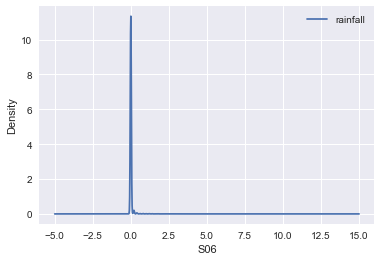

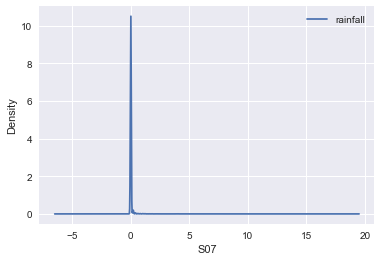

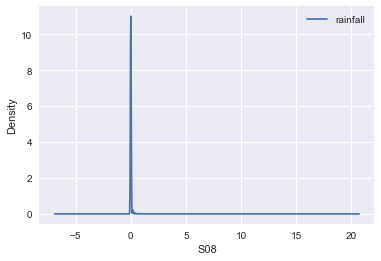

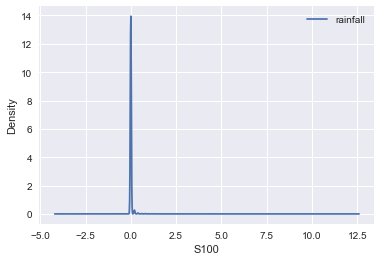

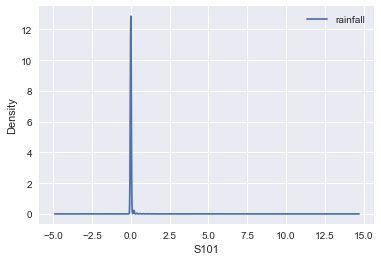

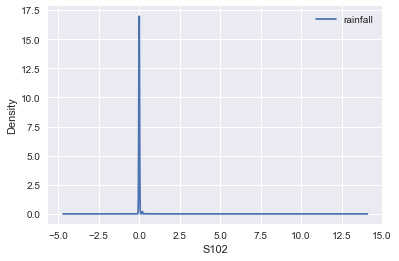

Error


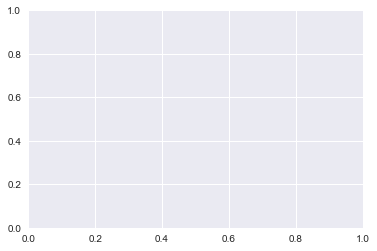

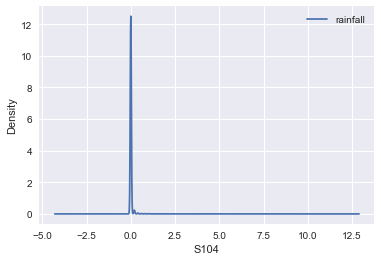

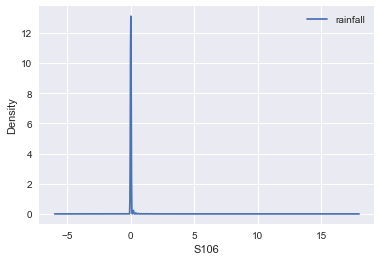

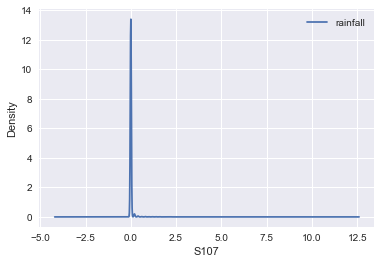

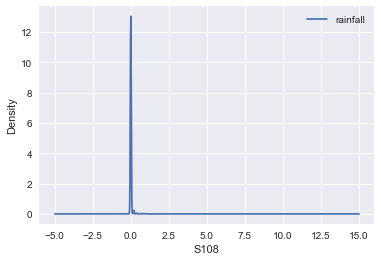

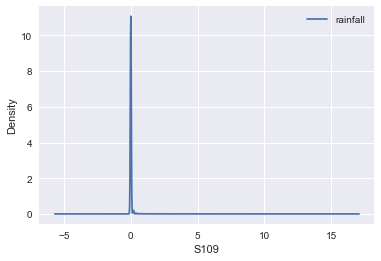

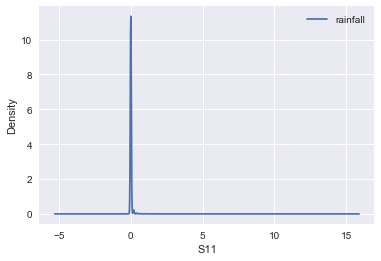

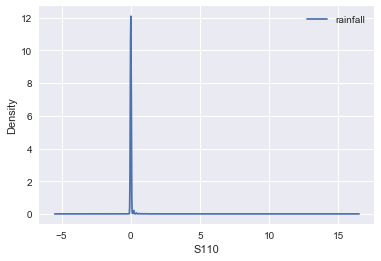

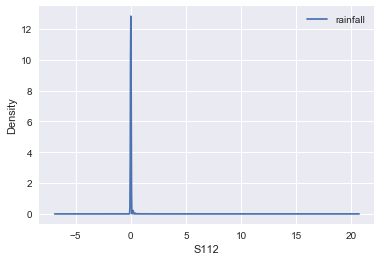

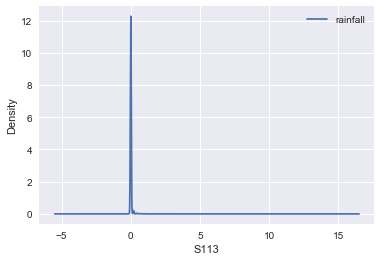

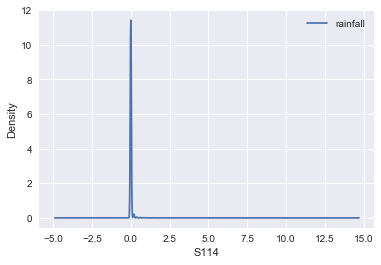

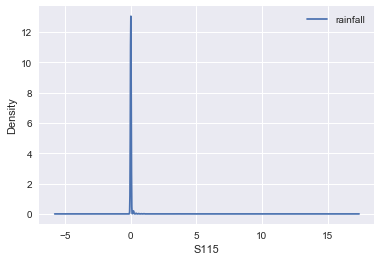

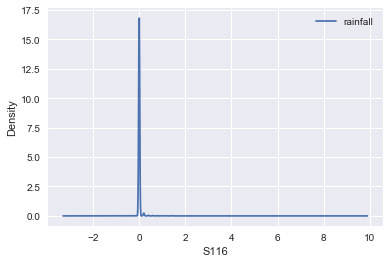

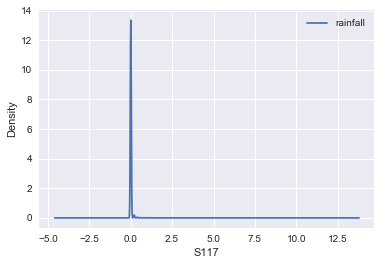

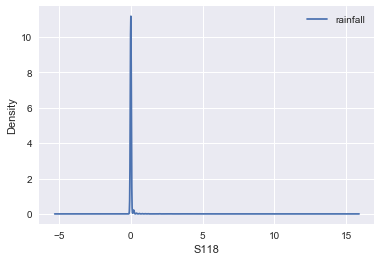

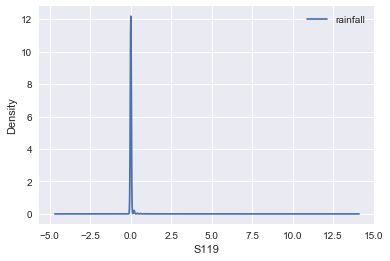

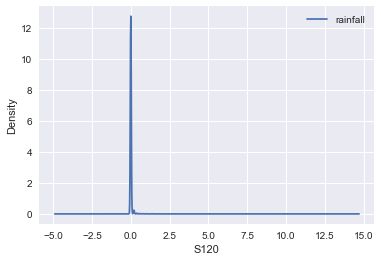

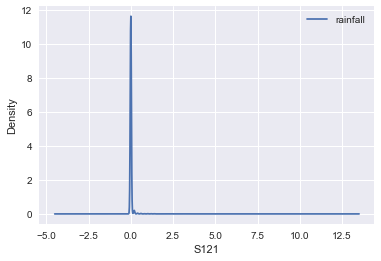

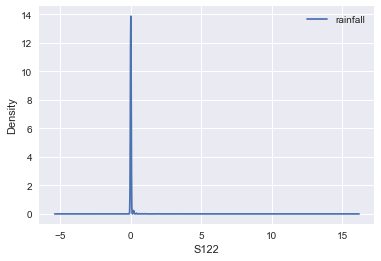

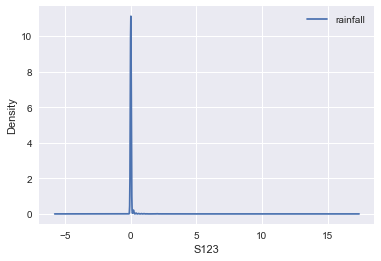

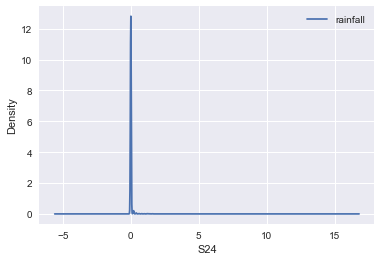

Error


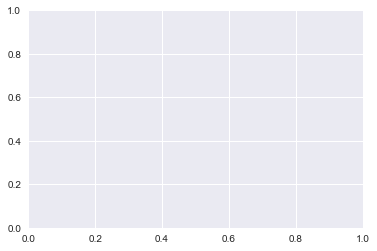

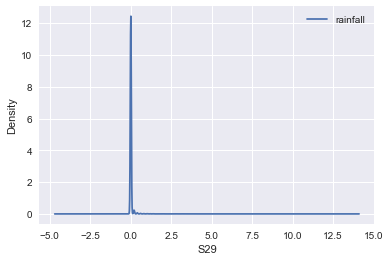

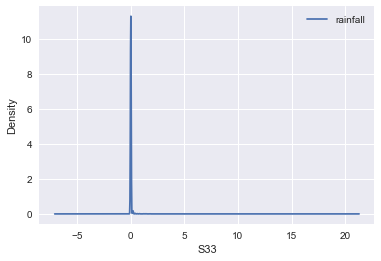

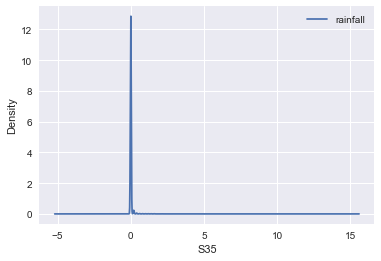

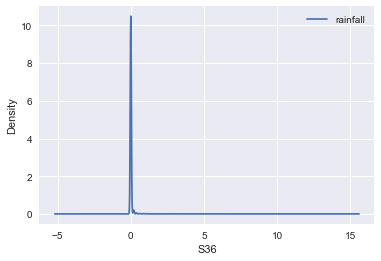

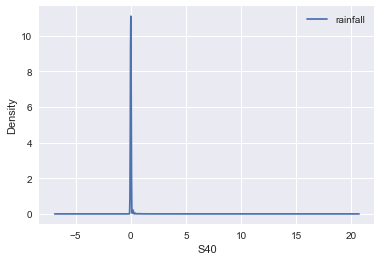

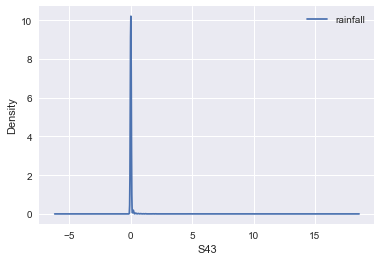

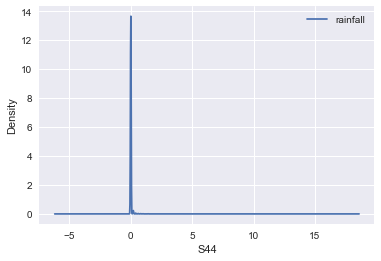

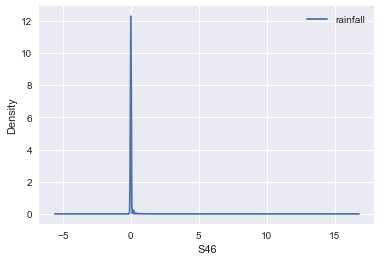

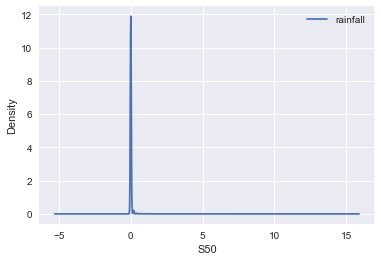

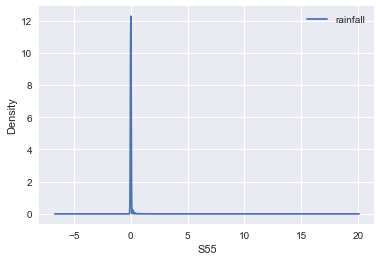

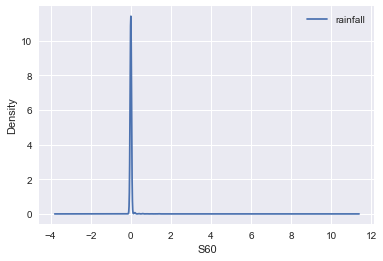

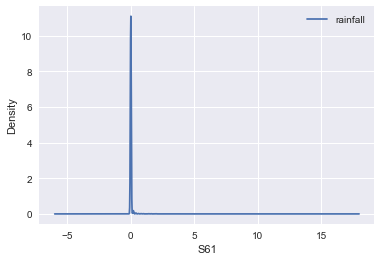

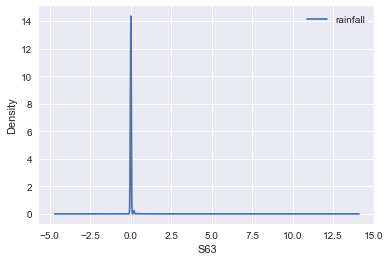

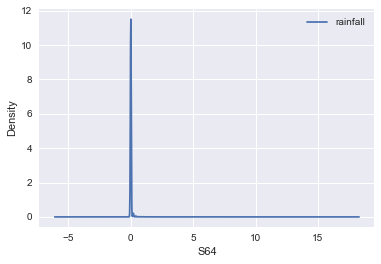

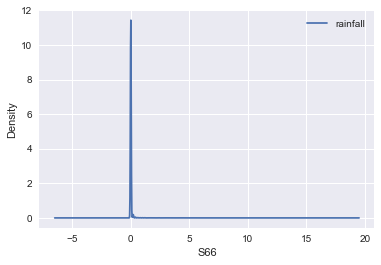

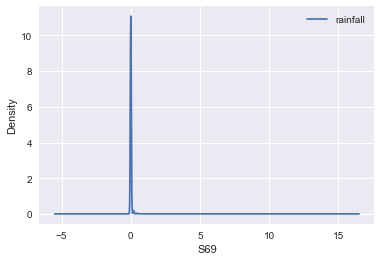

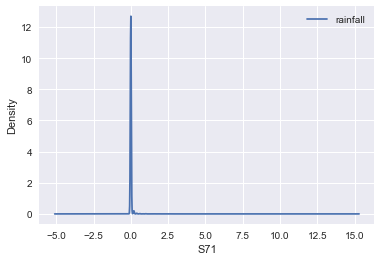

Error


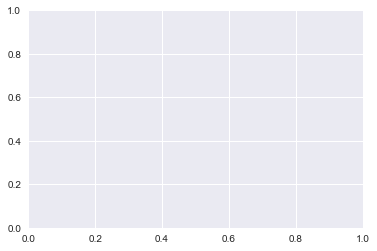

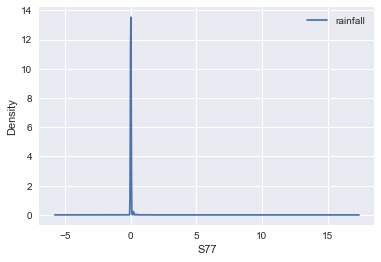

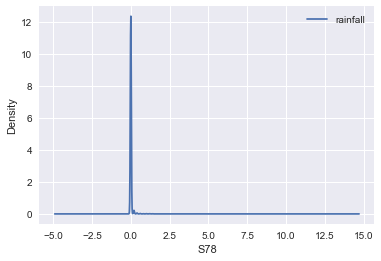

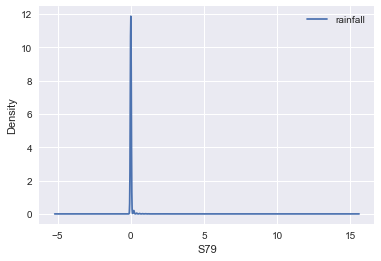

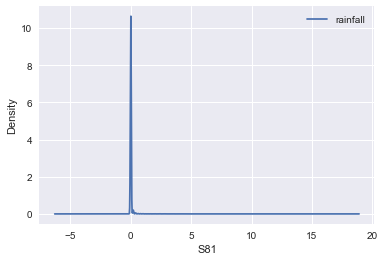

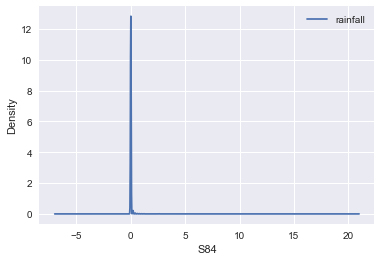

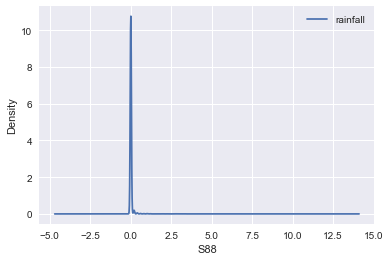

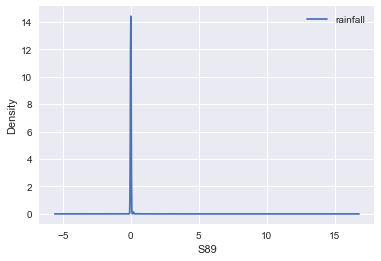

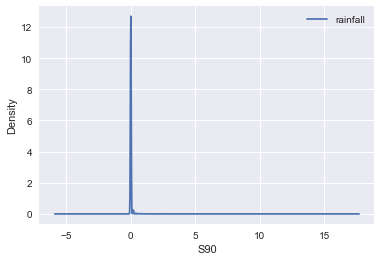

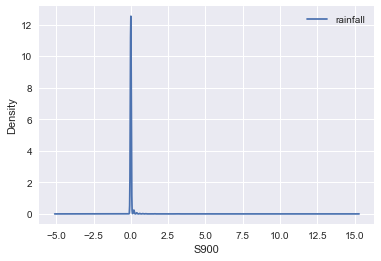

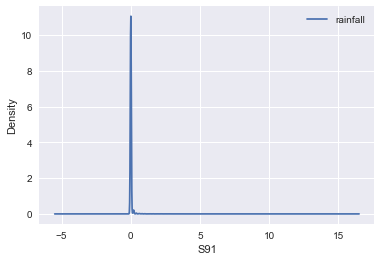

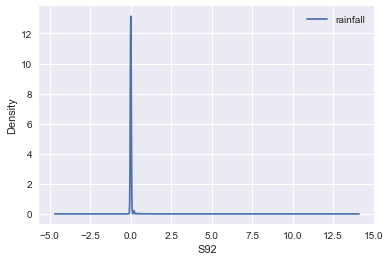

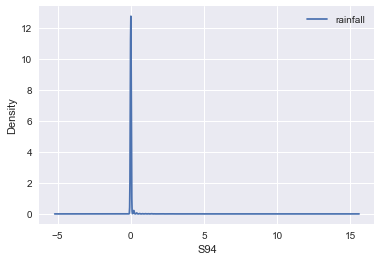

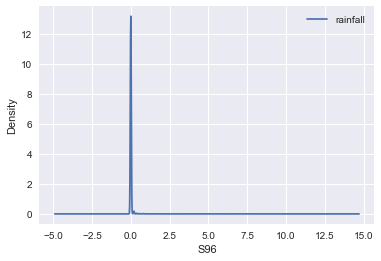

Error


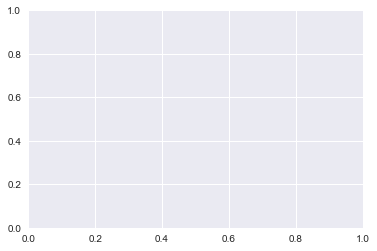

In [6]:
#Probability distributions for rainfall in mm per 5-min by station
stations = another_df.index.unique().tolist()
for station in stations:
    try:
        classified = another_df.loc[station]
        classified = classified.set_index("timestamp_sgt")
        plot = classified.plot.density(x=classified.index)
        plt.xlabel(station)
        plt.show()
    except np.linalg.LinAlgError:
        print("Error")
        continue
        

In [83]:
#temp = another_df.groupby("station_id")["rainfall"].count()
#temp = temp[temp==0]
#no_rain = list(temp.index)
#has_rain = another_df.drop(no_rain).sort_index()
#has_rain.head()

In [84]:
#for station in stations:
#    classified = has_rain.loc[station]
#    classified = classified.set_index("timestamp_sgt")
#    plot = classified.plot.density(x=classified.index)
#    plt.xlabel(station)
#    plt.show()

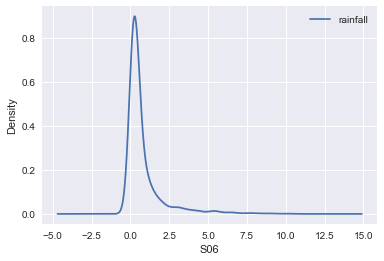

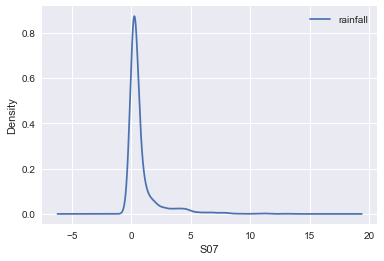

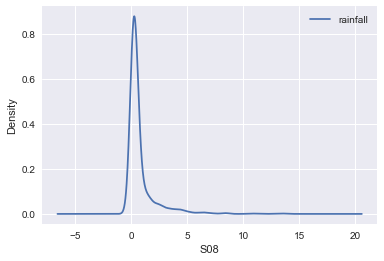

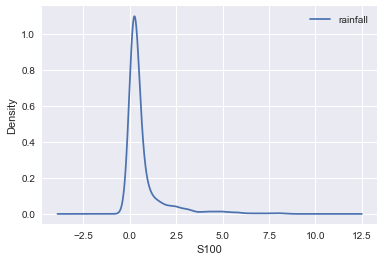

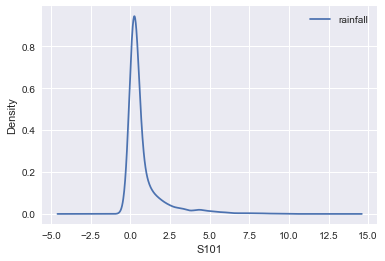

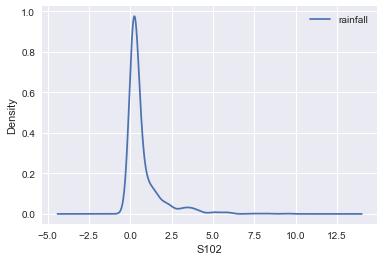

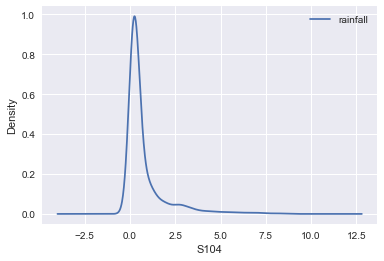

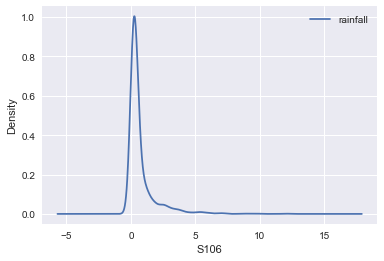

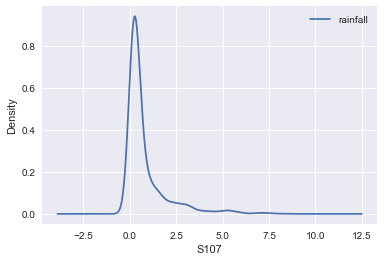

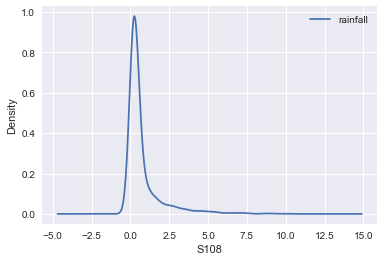

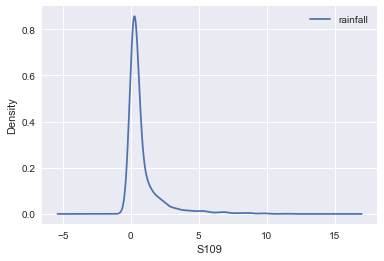

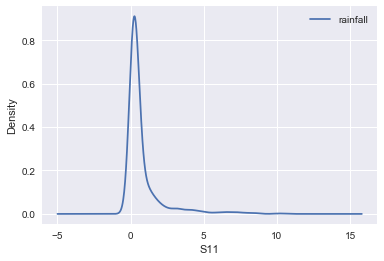

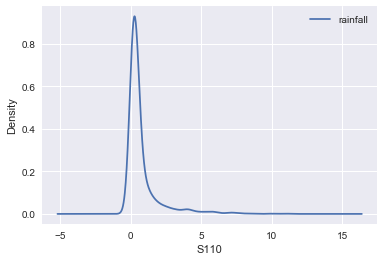

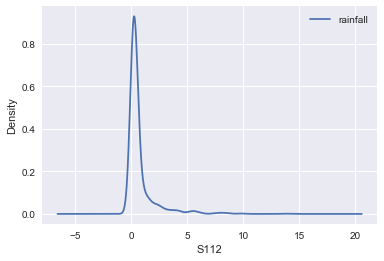

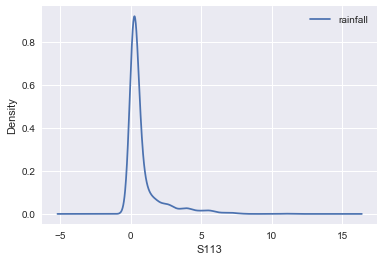

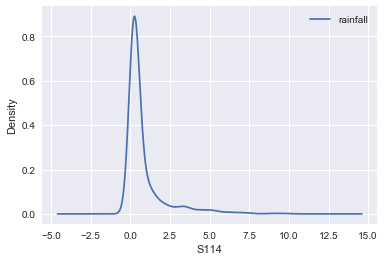

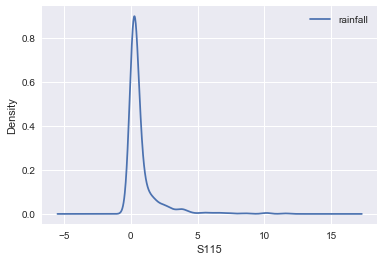

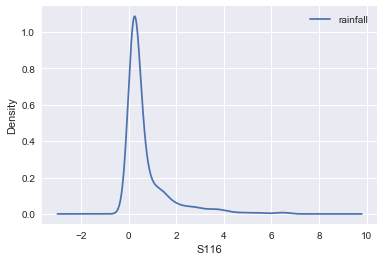

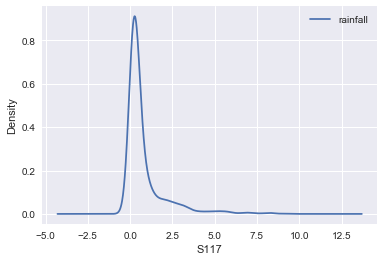

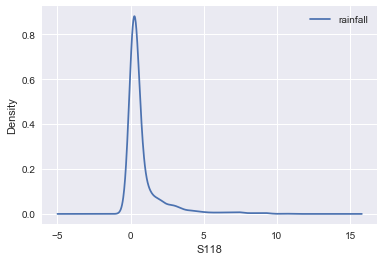

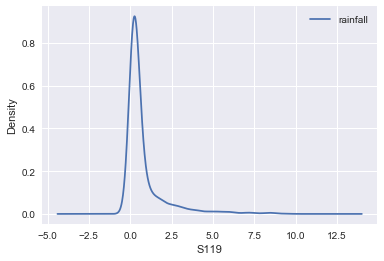

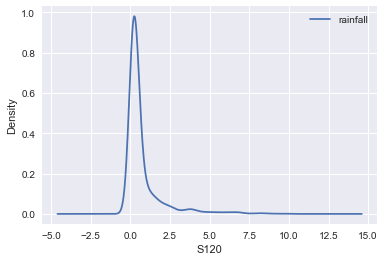

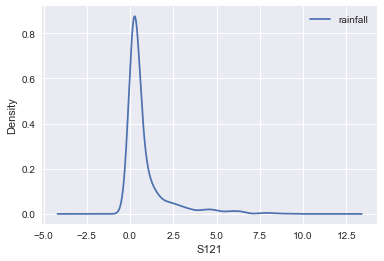

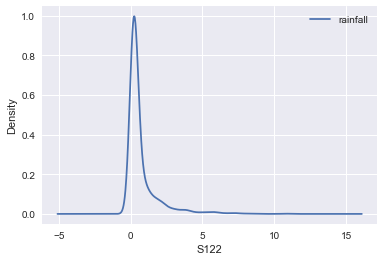

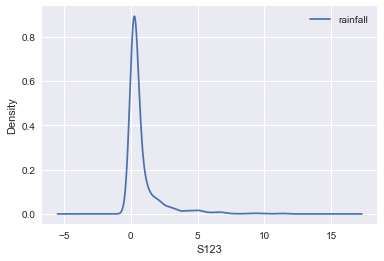

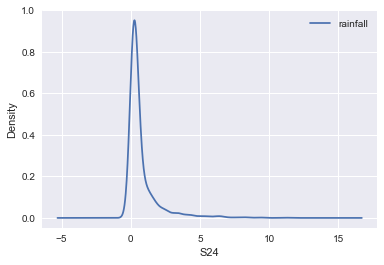

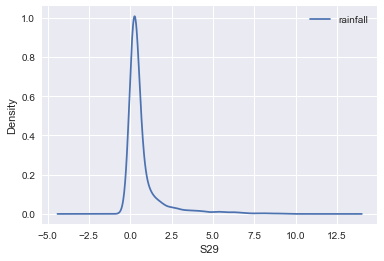

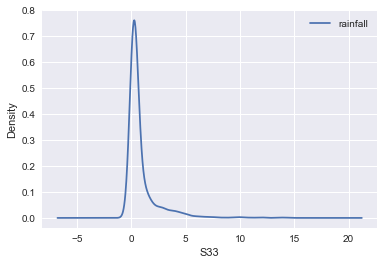

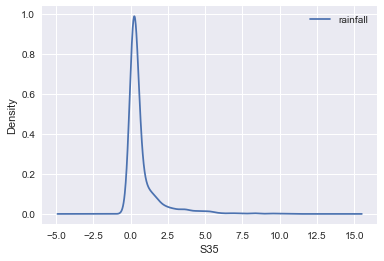

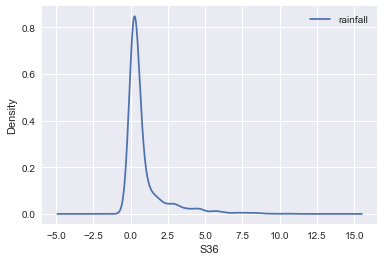

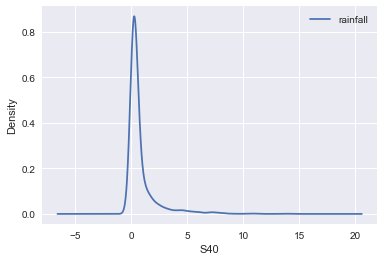

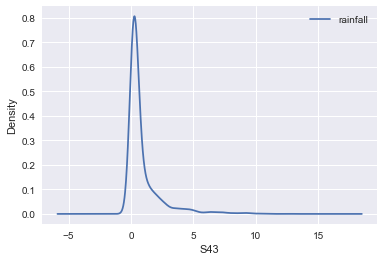

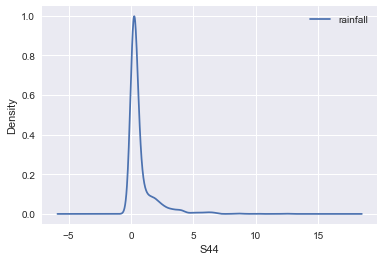

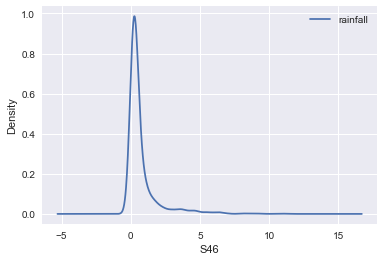

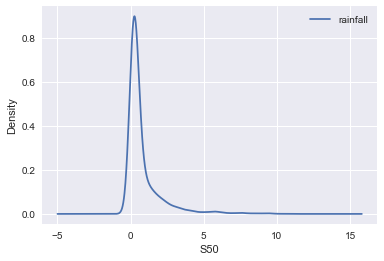

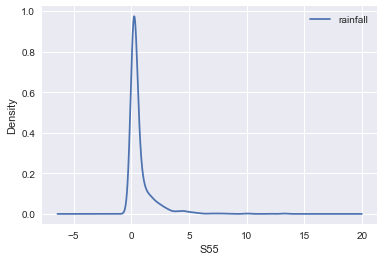

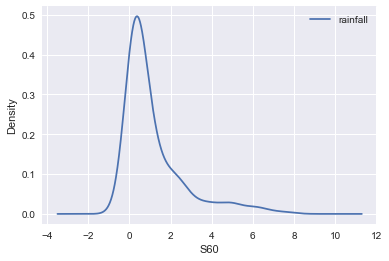

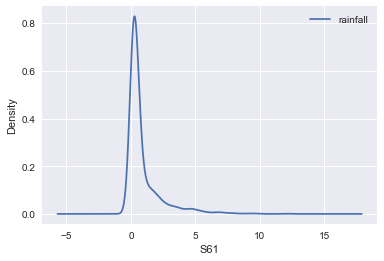

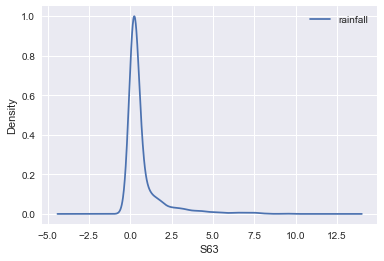

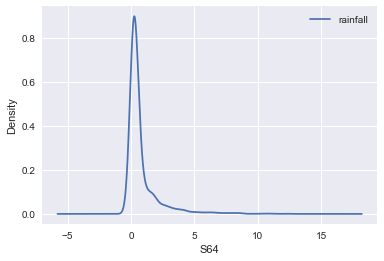

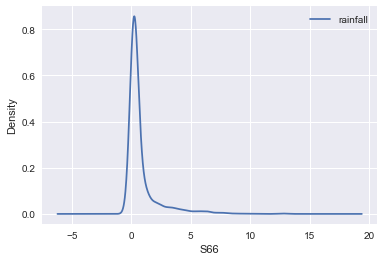

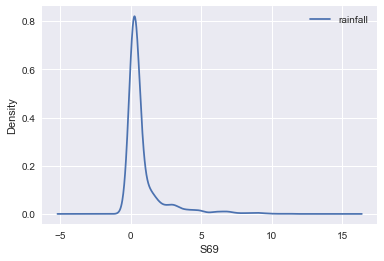

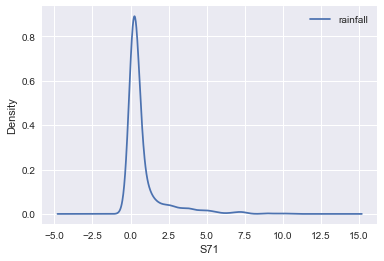

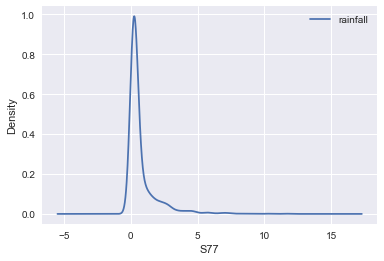

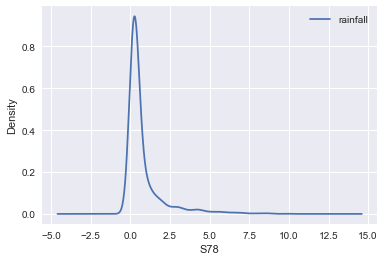

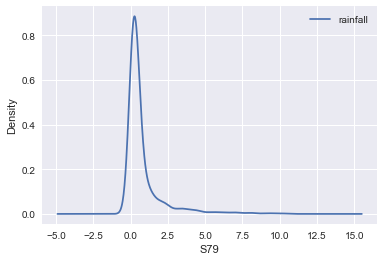

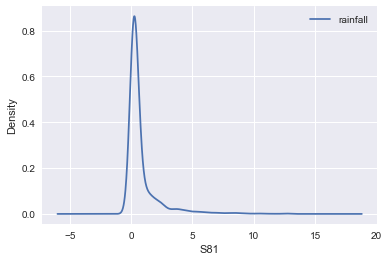

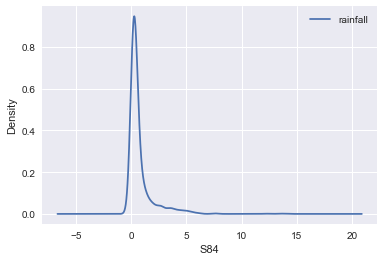

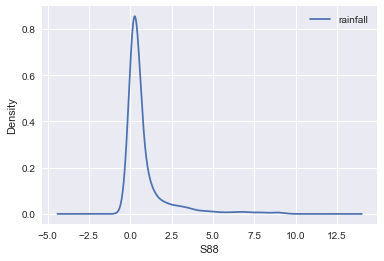

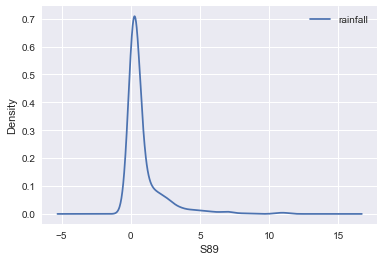

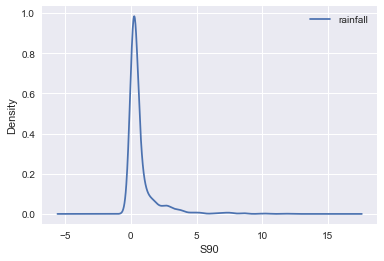

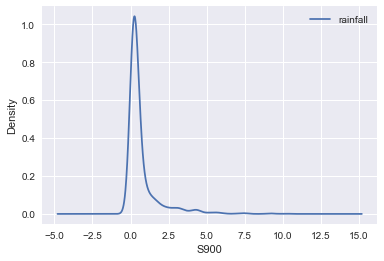

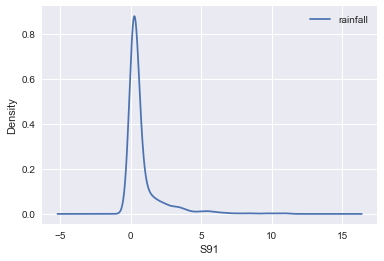

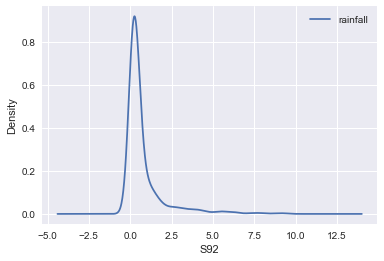

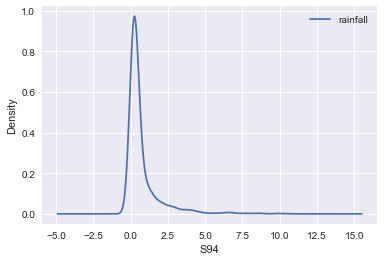

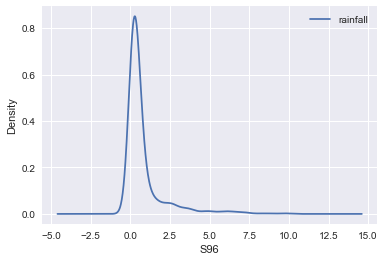

In [8]:
#Probability distributions for nonzero rainfall in mm per 5-min by station
non_zero = another_df[another_df["rainfall"]>0]
stations = non_zero.index.unique().tolist()
for station in stations:
    classified = non_zero.loc[station]
    classified = classified.set_index("timestamp_sgt")
    plot = classified.plot.density()
    plt.xlabel(station)
    plt.show()

In [86]:
#for station in stations:
#    classified = non_zero.loc[station]
#    classified = classified.set_index("timestamp_sgt").sort_index(ascending=True)
#    plot = classified.plot(kind="kde")
#    #fig, ax = plt.subplots(1,1)
#    #ax.plot(classified.index,classified["rainfall"])
#    plt.xlabel(station)
#    plt.show()

In [87]:
#classified = classified[classified["rainfall"]<0]
#classified

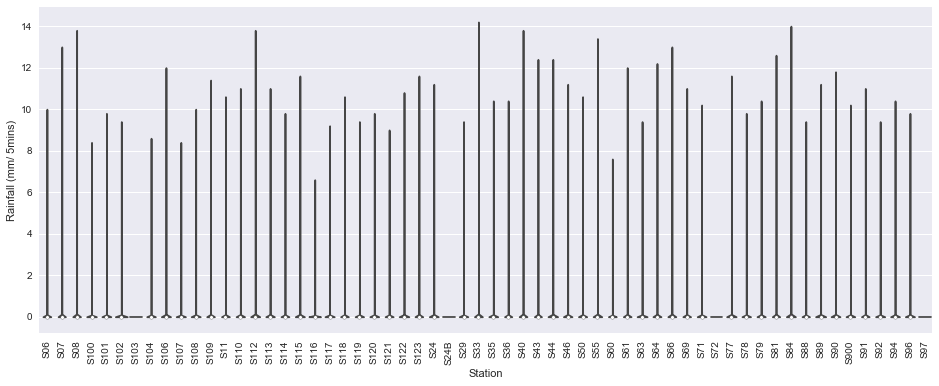

In [10]:
#Violinplots for rainfall in mm per 5-min by station
fig,ax=plt.subplots(figsize=(16,6))
sns.violinplot(x=another_df.index,y=another_df["rainfall"],cut=0,ax=ax)
ax.set_ylabel("Rainfall (mm/ 5mins)")
ax.set_xlabel("Station")
plt.xticks(rotation=90)
plt.show()

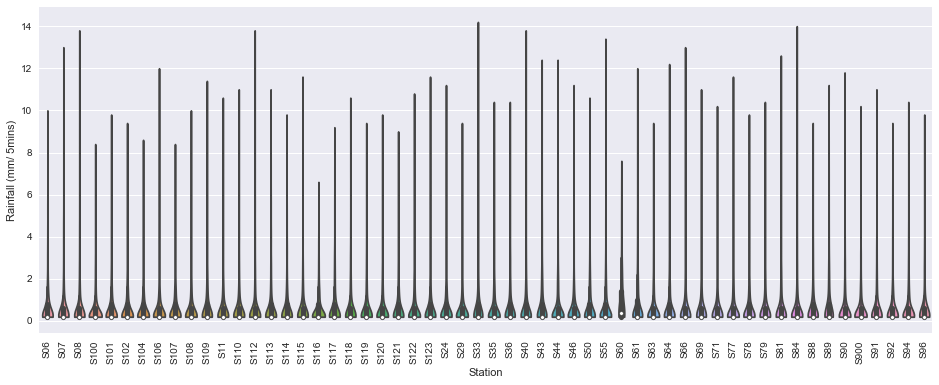

In [11]:
#Violinplots for nonzero rainfall in mm per 5-min by station
fig,ax=plt.subplots(figsize=(16,6))
sns.violinplot(x=non_zero.index,y=non_zero["rainfall"],cut=0,ax=ax)
ax.set_ylabel("Rainfall (mm/ 5mins)")
ax.set_xlabel("Station")
plt.xticks(rotation=90)
plt.show()

In [95]:
max_rainfall = non_zero[non_zero["rainfall"]>12.0]
max_rainfall

,rainfall,timestamp_sgt
station_id,,
S07,13.0,2016-12-24 17:34:59
S08,12.8,2017-01-19 15:24:59
S08,13.4,2017-01-19 15:29:59
S08,13.8,2017-01-19 15:34:59
S112,13.8,2016-12-23 19:59:59
S33,14.2,2017-02-20 17:19:59
S33,13.6,2017-04-10 06:54:59
S40,13.8,2017-03-25 16:19:59
S43,12.4,2017-04-27 16:25:00


In [114]:
high_rainfall = non_zero[non_zero["rainfall"]>8].reset_index()
high_rainfall = high_rainfall.sort_values("timestamp_sgt",ascending=True).set_index("timestamp_sgt")
high_rainfall

,station_id,rainfall
timestamp_sgt,,
2016-12-05 21:54:59,S89,11.00000
2016-12-05 22:04:59,S101,8.60000
2016-12-05 22:04:59,S33,10.80000
2016-12-05 22:09:59,S121,8.20000
2016-12-06 17:04:59,S81,9.00000
2016-12-06 17:19:59,S110,8.80000
2016-12-06 17:24:59,S94,8.60000
2016-12-06 17:24:59,S43,9.20000
2016-12-07 17:04:59,S24,9.40000


In [139]:
times = high_rainfall.index
high = high_rainfall.groupby([times.year,times.month,times.day,times.hour,times.minute])
high

In [140]:
high.first()

station_id  \
timestamp_sgt timestamp_sgt timestamp_sgt timestamp_sgt timestamp_sgt              
2016          12            5             21            54                   S89   
                                          22            4                   S101   
                                                        9                   S121   
                            6             17            4                    S81   
                                                        19                  S110   
                                                        24                   S94   
                            7             17            4                    S24   
                                                        9                    S24   
                                                        14                   S96   
                            9             15            9                    S91   
                                                        24                   S55   
                            17            13            24                   S96   
                                          17            34                   S29   
                            18            20            14                   S33   
                            22            13            54                  S101   
                                          14            19                   S08   
                                                        24                  S109   
                                                        29                  S109   
                                                        44                   S29   
                                                        54                   S81   
                                          15            9                    S96   
                            23            18            54                   S43   
                                                        59                   S36   
                                          19            14                   S07   
                                                        19                   S88   
                                                        24                  S114   
                                                        29                   S64   
                                                        34                   S64   
                                                        39                   S64   
                                                        44                   S40   
...                                                                          ...   
2017          4             20            12            44                  S109   
                                                        59                  S109   
                                          13            4                   S109   
                            21            7             14                  S115   
                                                        19                  S115   
                                                        24                  S115   
                                                        29                  S115   
                                                        34                  S115   
                                                        39                  S115   
                                                        44                  S115   
                                                        49                  S115   
                            24            14            29                   S81   
                                                        34                   S81   
                                                        39                   S81   
                                                        44                   S94   
                                      

In [138]:
high.last()

station_id  rainfall
timestamp_sgt timestamp_sgt timestamp_sgt timestamp_sgt                     
1             1             17            44                  S117       9.2
                                          49                  S117       8.2
              2             15            59                  S104       8.2
              10            16            29                   S07       8.4
                                          34                  S110      10.0
              11            16            24                   S81       8.4
                                          29                  S106      12.0
                                          34                  S106       8.6
                                          44                   S06       8.2
              13            15            54                   S61       9.4
              18            14            34                   S11       8.4
                                          49                   S11      10.0
                                          54                   S11       8.4
                                          59                   S44       8.8
                            15            4                    S44      12.4
                                          9                    S44      10.0
                                          14                   S88       8.8
                                          24                  S110      11.0
                                          49                   S43       9.4
                            16            4                    S91       9.4
                                          9                    S91       9.6
                                          14                   S91       8.2
              19            15            19                   S88       8.8
                                          24                   S08      12.8
                                          29                   S07      11.2
                                          34                   S69       8.2
                                          39                   S08       8.4
                                          44                   S69       9.8
                                          49                  S120       9.0
                                          54                   S90      11.8
...                                                            ...       ...
12            22            15            9                    S96       8.8
              23            18            54                   S43       9.0
                                          59                   S36       8.4
                            19            14                   S07      10.2
                                          19                   S36       8.2
                                          24                  S100       8.4
                                          29                   S64       8.6
                                          34                   S64       8.2
                                          39                   S64      12.2
                                          44                   S64      11.0
                                          49                   S64      10.6
                                          54                   S91      10.0
                                          59                  S112      13.8
                            20            4                   S112       9.6
                                          9                    S11       8.2
                                          14                  S101       9.8
                                          24                  S104       8.6
              24            17            4                    S43       9.6
                                          9                    S43       9.2
                                          14        

In [160]:
dropping = high.size()<2
dropping
#high.drop(dropping)

timestamp_sgt  timestamp_sgt  timestamp_sgt  timestamp_sgt  timestamp_sgt
2016           12             5              21             54                True
                                             22             4                False
                                                            9                 True
                              6              17             4                 True
                                                            19                True
                                                            24               False
                              7              17             4                 True
                                                            9                 True
                                                            14               False
                              9              15             9                 True
                                                            24                True
             

In [173]:
new_df = pd.DataFrame()
for name in ["{}".format(times.year, times.month, times.day, times.hour, times.minute).split(",")]:
    group = high.get_group(name)
    for group in (dropping==False):
        new_df.append(high(year,month,day,hour,minute))

ValueError: must supply a tuple to get_group with multiple grouping keys

In [142]:
high.groups

{(2016,
  12,
  5,
  21,
  54): DatetimeIndex(['2016-12-05 21:54:59'], dtype='datetime64[ns]', name='timestamp_sgt', freq=None),
 (2016,
  12,
  5,
  22,
  4): DatetimeIndex(['2016-12-05 22:04:59', '2016-12-05 22:04:59'], dtype='datetime64[ns]', name='timestamp_sgt', freq=None),
 (2016,
  12,
  5,
  22,
  9): DatetimeIndex(['2016-12-05 22:09:59'], dtype='datetime64[ns]', name='timestamp_sgt', freq=None),
 (2016,
  12,
  6,
  17,
  4): DatetimeIndex(['2016-12-06 17:04:59'], dtype='datetime64[ns]', name='timestamp_sgt', freq=None),
 (2016,
  12,
  6,
  17,
  19): DatetimeIndex(['2016-12-06 17:19:59'], dtype='datetime64[ns]', name='timestamp_sgt', freq=None),
 (2016,
  12,
  6,
  17,
  24): DatetimeIndex(['2016-12-06 17:24:59', '2016-12-06 17:24:59'], dtype='datetime64[ns]', name='timestamp_sgt', freq=None),
 (2016,
  12,
  7,
  17,
  4): DatetimeIndex(['2016-12-07 17:04:59'], dtype='datetime64[ns]', name='timestamp_sgt', freq=None),
 (2016,
  12,
  7,
  17,
  9): DatetimeIndex(['2016-12-

In [174]:
for [year,month,day,hour,minute] in high_rainfall[times.year,times.month,times.day,times.hour,times.minute]:
    new = high.get_group((year,month,day,hour,minute))
    print(new)
#dropping = high.groups[high.groups.count()<2]

TypeError: unhashable type: 'Int64Index'

In [197]:
high_rainfall = high_rainfall.set_index([times.year,times.month,times.day,times.hour])
high_rainfall.index.names = ["year","month","day","hour"]
print(high_rainfall.head())
high = high_rainfall.groupby([times.year,times.month,times.day,times.hour])["rainfall"].count()
not_high = high[high<2]
new = list(not_high.index)
#print(new)
movement = high_rainfall.drop(new)
movement

                          timestamp_sgt station_id  rainfall
year month day hour                                         
2016 12    5   21   2016-12-05 21:54:59        S89      11.0
               22   2016-12-05 22:04:59       S101       8.6
               22   2016-12-05 22:04:59        S33      10.8
               22   2016-12-05 22:09:59       S121       8.2
           6   17   2016-12-06 17:04:59        S81       9.0


timestamp_sgt station_id  rainfall
year month day hour                                         
2016 12    5   22   2016-12-05 22:04:59       S101   8.60000
               22   2016-12-05 22:04:59        S33  10.80000
               22   2016-12-05 22:09:59       S121   8.20000
           6   17   2016-12-06 17:04:59        S81   9.00000
               17   2016-12-06 17:19:59       S110   8.80000
               17   2016-12-06 17:24:59        S94   8.60000
               17   2016-12-06 17:24:59        S43   9.20000
           7   17   2016-12-07 17:04:59        S24   9.40000
               17   2016-12-07 17:09:59        S24  11.20000
               17   2016-12-07 17:14:59        S96   8.40000
               17   2016-12-07 17:14:59        S24   9.20000
           9   15   2016-12-09 15:09:59        S91   8.60000
               15   2016-12-09 15:24:59        S55  12.00000
           18  20   2016-12-18 20:14:59        S33  10.00000
               20   2016-12-18 20:14:59       S101   9.20000
           22  14   2016-12-22 14:19:59        S08  11.00000
               14   2016-12-22 14:24:59       S109   8.60000
               14   2016-12-22 14:29:59       S109   8.80000
               14   2016-12-22 14:44:59        S29   8.80000
               14   2016-12-22 14:54:59        S81   9.60000
               14   2016-12-22 14:54:59        S91   8.20000
           23  18   2016-12-23 18:54:59        S43   9.00000
               18   2016-12-23 18:59:59        S36   8.40000
               19   2016-12-23 19:14:59        S07  10.20000
               19   2016-12-23 19:19:59        S88   9.00000
               19   2016-12-23 19:19:59        S36   8.20000
               19   2016-12-23 19:24:59       S114   9.20000
               19   2016-12-23 19:24:59        S64   8.60000
               19   2016-12-23 19:24:59       S100   8.40000
               19   2016-12-23 19:29:59        S64   8.60000
...                                 ...        ...       ...
2017 4     20  12   2017-04-20 12:59:59       S109   8.80000
           21  7    2017-04-21 07:14:59       S115  11.60000
               7    2017-04-21 07:19:59       S115  11.60000
               7    2017-04-21 07:24:59       S115  10.20000
               7    2017-04-21 07:29:59       S115  10.20000
               7    2017-04-21 07:34:59       S115   8.20000
               7    2017-04-21 07:39:59       S115   8.60000
               7    2017-04-21 07:44:59       S115  10.00000
               7    2017-04-21 07:49:59       S115  10.20000
           24  14   2017-04-24 14:29:59        S81  10.40000
               14   2017-04-24 14:34:59        S81  12.60000
               14   2017-04-24 14:39:59        S81  12.60000
               14   2017-04-24 14:44:59        S94   9.80000
               14   2017-04-24 14:44:59        S81  10.40000
               14   2017-04-24 14:44:59        S29   8.20000
               14   2017-04-24 14:49:59        S94   8.80000
               14   2017-04-24 14:49:59        S81   9.20000
               14   2017-04-24 14:54:59        S81   8.60000
               14   2017-04-24 14:54:59        S29   9.40000
           25  12   2017-04-25 12:00:00        S50   9.20000
               12   2017-04-25 12:10:00        S50   8.39999
               12   2017-04-25 12:20:00        S43   8.20000
               12   2017-04-25 12:25:00        S43  10.20000
           27  16   2017-04-27 16:25:00        S43  12.40000
               16   2017-04-27 16:30:00        S43  10.60000
               16   2017-04-27 16:35:00        S43   8.80000
               16   2017-04-27 16:40:00        S43   8.39999
               16   2017-04-27 16:55:00        S35   8.60001
               17   2017-04-27 17:00:00        S35  10.40000
               17   2017-04-27 17:05:00        S35   9.60001

[280 rows x 3 columns]

In [205]:
dict = {}
empty_list=()
for [year,month,day,hour] in high_rainfall.index:
    new_list["{}".format(year,month,day,hour)] = empty_list().append(high_rainfall.loc([year,month,day,hour])["station_id"])
    print(new_list["{}".format(year,month,day,hour)])

TypeError: 'tuple' object is not callable

In [312]:
locations = pd.read_csv("StationLocations.csv")
locations=locations.rename(columns={"Lon (d)":"Longitude","Lat (d)":"Latitude"})
locations

,station_id,Longitude,Latitude
0,S06,103.90070,1.35240
1,S07,103.83340,1.34150
2,S08,103.82710,1.37010
3,S11,103.69380,1.37460
4,S23,103.71140,1.38580
5,S24,103.98260,1.36780
6,S25,103.86540,1.41660
7,S29,103.93500,1.38700
8,S31,103.82800,1.27450
9,S33,103.71000,1.30810


In [313]:
inner_df = pd.merge(movement,locations, left_index = True,how="left",on="station_id")
inner_df

,timestamp_sgt,station_id,rainfall,Longitude,Latitude
43,2016-12-05 22:04:59,S101,8.60000,103.71340,1.35053
9,2016-12-05 22:04:59,S33,10.80000,103.71000,1.30810
62,2016-12-05 22:09:59,S121,8.20000,103.72244,1.37288
31,2016-12-06 17:04:59,S81,9.00000,103.90920,1.40290
51,2016-12-06 17:19:59,S110,8.80000,103.86970,1.36061
40,2016-12-06 17:24:59,S94,8.60000,103.95280,1.36620
14,2016-12-06 17:24:59,S43,9.20000,103.88780,1.33990
5,2016-12-07 17:04:59,S24,9.40000,103.98260,1.36780
5,2016-12-07 17:09:59,S24,11.20000,103.98260,1.36780
41,2016-12-07 17:14:59,S96,8.40000,104.03070,1.31750


In [314]:
inner_df = inner_df.sort_values("timestamp_sgt",ascending=True).set_index("timestamp_sgt")
times = inner_df.index
inner_df.reset_index(inplace=True)
inner_df = inner_df.set_index([times.year,times.month,times.day,times.hour])
inner_df.index.names = ["year","month","day","hour"]
inner_df

timestamp_sgt station_id  rainfall  Longitude  \
year month day hour                                                       
2016 12    5   22   2016-12-05 22:04:59       S101   8.60000  103.71340   
               22   2016-12-05 22:04:59        S33  10.80000  103.71000   
               22   2016-12-05 22:09:59       S121   8.20000  103.72244   
           6   17   2016-12-06 17:04:59        S81   9.00000  103.90920   
               17   2016-12-06 17:19:59       S110   8.80000  103.86970   
               17   2016-12-06 17:24:59        S94   8.60000  103.95280   
               17   2016-12-06 17:24:59        S43   9.20000  103.88780   
           7   17   2016-12-07 17:04:59        S24   9.40000  103.98260   
               17   2016-12-07 17:09:59        S24  11.20000  103.98260   
               17   2016-12-07 17:14:59        S96   8.40000  104.03070   
               17   2016-12-07 17:14:59        S24   9.20000  103.98260   
           9   15   2016-12-09 15:09:59        S91   8.60000  103.83080   
               15   2016-12-09 15:24:59        S55  12.00000  103.88600   
           18  20   2016-12-18 20:14:59        S33  10.00000  103.71000   
               20   2016-12-18 20:14:59       S101   9.20000  103.71340   
           22  14   2016-12-22 14:19:59        S08  11.00000  103.82710   
               14   2016-12-22 14:24:59       S109   8.60000  103.84920   
               14   2016-12-22 14:29:59       S109   8.80000  103.84920   
               14   2016-12-22 14:44:59        S29   8.80000  103.93500   
               14   2016-12-22 14:54:59        S81   9.60000  103.90920   
               14   2016-12-22 14:54:59        S91   8.20000  103.83080   
           23  18   2016-12-23 18:54:59        S43   9.00000  103.88780   
               18   2016-12-23 18:59:59        S36   8.40000  103.86570   
               19   2016-12-23 19:14:59        S07  10.20000  103.83340   
               19   2016-12-23 19:19:59        S88   9.00000  103.84820   
               19   2016-12-23 19:19:59        S36   8.20000  103.86570   
               19   2016-12-23 19:24:59       S114   9.20000  103.73000   
               19   2016-12-23 19:24:59        S64   8.60000  103.76030   
               19   2016-12-23 19:24:59       S100   8.40000  103.74855   
               19   2016-12-23 19:29:59        S64   8.60000  103.76030   
...                                 ...        ...       ...        ...   
2017 4     20  12   2017-04-20 12:59:59       S109   8.80000  103.84920   
           21  7    2017-04-21 07:14:59       S115  11.60000  103.61843   
               7    2017-04-21 07:19:59       S115  11.60000  103.61843   
               7    2017-04-21 07:24:59       S115  10.20000  103.61843   
               7    2017-04-21 07:29:59       S115  10.20000  103.61843   
               7    2017-04-21 07:34:59       S115   8.20000  103.61843   
               7    2017-04-21 07:39:59       S115   8.60000  103.61843   
               7    2017-04-21 07:44:59       S115  10.00000  103.61843   
               7    2017-04-21 07:49:59       S115  10.20000  103.61843   
           24  14   2017-04-24 14:29:59        S81  10.40000  103.90920   
               14   2017-04-24 14:34:59        S81  12.60000  103.90920   
               14   2017-04-24 14:39:59        S81  12.60000  103.90920   
               14   2017-04-24 14:44:59        S29   8.20000  103.93500   
               14   2017-04-24 14:44:59        S94   9.80000  103.95280   
               14   2017-04-24 14:44:59        S81  10.40000  103.90920   
               14   2017-04-24 14:49:59        S94   8.80000  103.95280   
               14   2017-04-24 14:49:59        S81   9.20000  103.90920   
               14   2017-04-24 14:54:59        S81   8.60000  103.90920   
               14   2017-04-24 14:54:59        S29   9.40000  103.93500   
           25  12   2017-04-25 12:00:00        S50   9.20000  103.77680   
               12   2017-04-25 12:10:00        S50 

In [315]:
n=len(inner_df.index.unique())
n

53

In [316]:
inner_df.index.unique()

MultiIndex(levels=[[2016, 2017], [1, 2, 3, 4, 12], [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 31], [2, 3, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 4, 5, 7, 13, 17, 18, 18, 18, 19, 20, 0, 8, 9, 13, 13, 13, 14, 14, 16, 18, 18, 1, 2, 3, 6, 16, 18, 20, 4, 4, 9, 12, 12, 20, 20, 20, 22, 23, 24, 5, 8, 10, 11, 12, 13, 13, 15, 16, 19, 20, 21, 21], [16, 12, 12, 10, 15, 9, 13, 14, 15, 12, 11, 12, 11, 11, 9, 10, 11, 10, 11, 12, 4, 13, 12, 11, 12, 12, 11, 10, 11, 10, 11, 10, 9, 11, 9, 10, 11, 5, 6, 10, 0, 2, 1, 9, 12, 8, 9, 7, 3, 9, 7, 11, 12]])

In [317]:
indices = inner_df.index.unique().values
indices

array([(2016, 12, 5, 22), (2016, 12, 6, 17), (2016, 12, 7, 17),
       (2016, 12, 9, 15), (2016, 12, 18, 20), (2016, 12, 22, 14),
       (2016, 12, 23, 18), (2016, 12, 23, 19), (2016, 12, 23, 20),
       (2016, 12, 24, 17), (2016, 12, 25, 16), (2017, 1, 1, 17),
       (2017, 1, 10, 16), (2017, 1, 11, 16), (2017, 1, 18, 14),
       (2017, 1, 18, 15), (2017, 1, 18, 16), (2017, 1, 19, 15),
       (2017, 1, 19, 16), (2017, 1, 21, 17), (2017, 1, 23, 9),
       (2017, 1, 23, 18), (2017, 2, 3, 17), (2017, 2, 4, 16),
       (2017, 2, 5, 17), (2017, 2, 8, 17), (2017, 2, 21, 16),
       (2017, 2, 23, 15), (2017, 2, 25, 16), (2017, 3, 6, 15),
       (2017, 3, 6, 16), (2017, 3, 11, 15), (2017, 3, 17, 14),
       (2017, 3, 17, 16), (2017, 3, 25, 14), (2017, 3, 25, 15),
       (2017, 3, 25, 16), (2017, 3, 28, 10), (2017, 3, 29, 11),
       (2017, 3, 31, 15), (2017, 4, 7, 2), (2017, 4, 10, 6),
       (2017, 4, 12, 3), (2017, 4, 14, 14), (2017, 4, 17, 17),
       (2017, 4, 18, 13), (2017, 4, 18, 14), 

In [318]:
for index in indices:
    stat = inner_df.loc[index]
    station = inner_df.loc[index]["station_id"]
    longitude = inner_df.loc[index]["Longitude"]
    latitude = inner_df.loc[index]["Latitude"]
    print(station,longitude,latitude)

year  month  day  hour
2016  12     5    22      S101
                  22       S33
                  22      S121
Name: station_id, dtype: object year  month  day  hour
2016  12     5    22      103.71340
                  22      103.71000
                  22      103.72244
Name: Longitude, dtype: float64 year  month  day  hour
2016  12     5    22      1.35053
                  22      1.30810
                  22      1.37288
Name: Latitude, dtype: float64
year  month  day  hour
2016  12     6    17       S81
                  17      S110
                  17       S94
                  17       S43
Name: station_id, dtype: object year  month  day  hour
2016  12     6    17      103.9092
                  17      103.8697
                  17      103.9528
                  17      103.8878
Name: Longitude, dtype: float64 year  month  day  hour
2016  12     6    17      1.40290
                  17      1.36061
                  17      1.36620
                  17      1.33990


Name: station_id, dtype: object year  month  day  hour
2017  1      18   16      103.8308
                  16      103.8308
                  16      103.8308
Name: Longitude, dtype: float64 year  month  day  hour
2017  1      18   16      1.4301
                  16      1.4301
                  16      1.4301
Name: Latitude, dtype: float64
year  month  day  hour
2017  1      19   15       S88
                  15       S88
                  15       S08
                  15       S08
                  15       S07
                  15       S08
                  15       S69
                  15       S07
                  15       S46
                  15       S69
                  15       S08
                  15       S69
                  15       S90
                  15      S120
                  15       S90
Name: station_id, dtype: object year  month  day  hour
2017  1      19   15      103.8482
                  15      103.8482
                  15      103.8271
       

Name: Longitude, dtype: float64 year  month  day  hour
2017  3      11   15      1.37460
                  15      1.37288
                  15      1.34160
Name: Latitude, dtype: float64
year  month  day  hour
2017  3      17   14       S08
                  14      S900
                  14      S109
Name: station_id, dtype: object year  month  day  hour
2017  3      17   14      103.82710
                  14      103.86922
                  14      103.84920
Name: Longitude, dtype: float64 year  month  day  hour
2017  3      17   14      1.37010
                  14      1.41284
                  14      1.37640
Name: Latitude, dtype: float64
year  month  day  hour
2017  3      17   16      S33
                  16      S33
                  16      S63
                  16      S33
Name: station_id, dtype: object year  month  day  hour
2017  3      17   16      103.7100
                  16      103.7100
                  16      103.7042
                  16      103.7100
Name: L

In [324]:
for index in indices:
    station = inner_df.loc[index]["station_id"]
    longitude = inner_df.loc[index]["Longitude"]
    latitude = inner_df.loc[index]["Latitude"]
    stat = inner_df.loc[index]